In [36]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
def parse_and_plot(filename):
    df = pd.read_csv(filename,header=None)
    df /= float(1e6) # convert to milliseconds
    ax = df.plot(kind='hist', bins=50, figsize=(15,8))
    ax.set_title("Initial Diff Latency")
    ax.set_ylabel("Latency (ms)")
    ax = df.plot(kind='line',style='-',figsize=(15,8))
    ax.set_title("Initial Diff Latency")
    ax.set_ylabel("Latency (ms)")
    ax.set_xlabel("Sample #")
    return df

## Forwarding Latency

It is being run from a desktop computer on the UC Berkeley network w/ avg ping latency of 5.03ms to a single broker running on EC2 running in standalone mode.

### Pairs

10 pairs of pub/sub that share a query. Publishers at a rate of 10 msg/sec, runtime of 20 minutes. Each query has a unique key and value

In [ ]:
FILENAME="data/10_pub_sub_pairs.csv"
df = parse_and_plot(FILENAME)
df.describe()

---

100 pairs of pub/sub that share a query. Publishers at a rate of 10 msg/sec, runtime of 20 minutes. Each query has a unique key and value

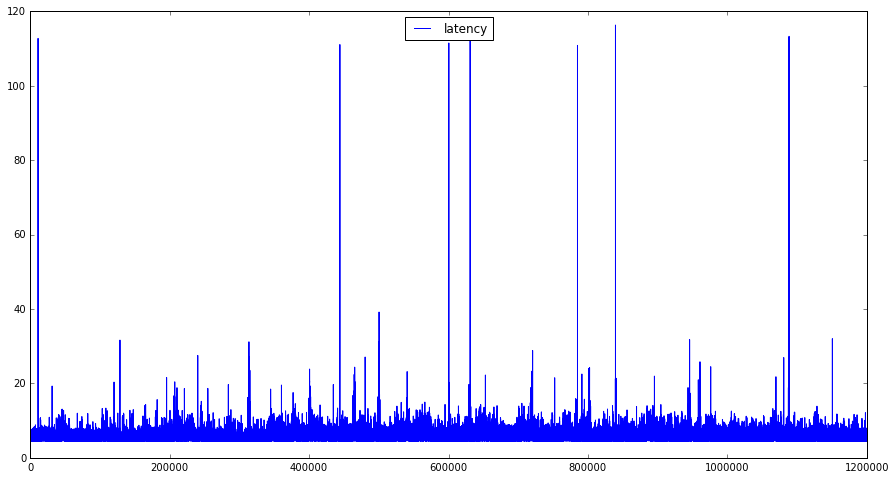

In [3]:
filename="data/forwarding_latency_100pub_to_1sub.csv"
df = pd.read_csv(filename)
df /= float(1e6)
df.plot(kind='line', figsize=(15,8))

0    4.98007
dtype: float64


,0
count,30681.000000
mean,4.671935
std,0.550779
min,4.383656
25%,4.590678
50%,4.640270
75%,4.698337
max,53.796289


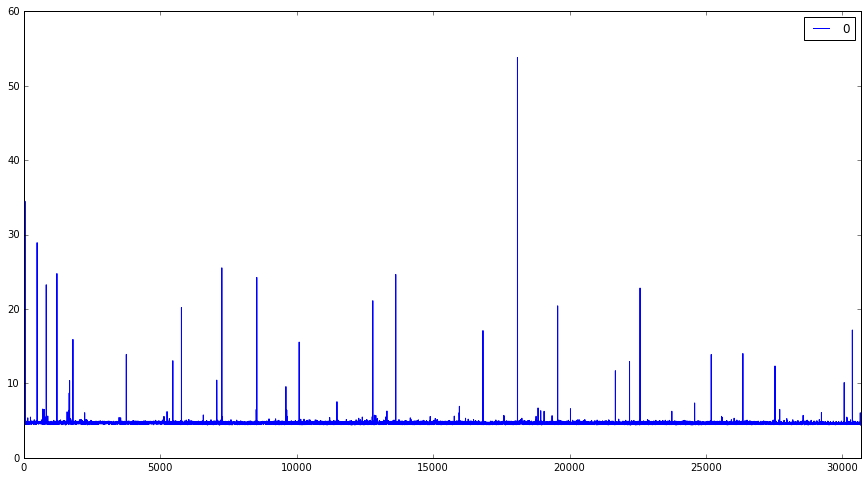

In [15]:
filename="data/1_client_10_pub.csv"
df1 = pd.read_csv(filename, header=None)
df1 /= float(1e6)
df1.plot(style='-',figsize=(15,8))
print df1.quantile(q=.99)
df1.describe()

We wil run `forwrdingLatencyNto1` for clients = 1, 10, 100. In the N > 1 case, we average the N clients together to get a single timeseries for that case, then we will plot them all together

5.783212584


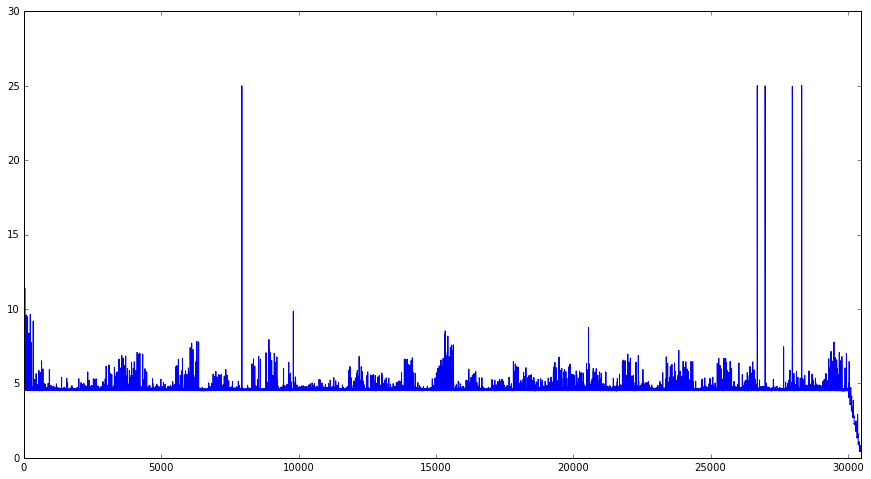

In [17]:
filename="data/10_client_100_pub.csv"
df2 = pd.read_csv(filename, header=None)
df2 /= float(1e6)
df2[0] = df2.mean(axis=1)
print df2[0].quantile(q=.99)
df2[0].plot(style='-',figsize=(15,8))
#df2.describe()


In [18]:
df1[1] = df2[0]

396.850573892


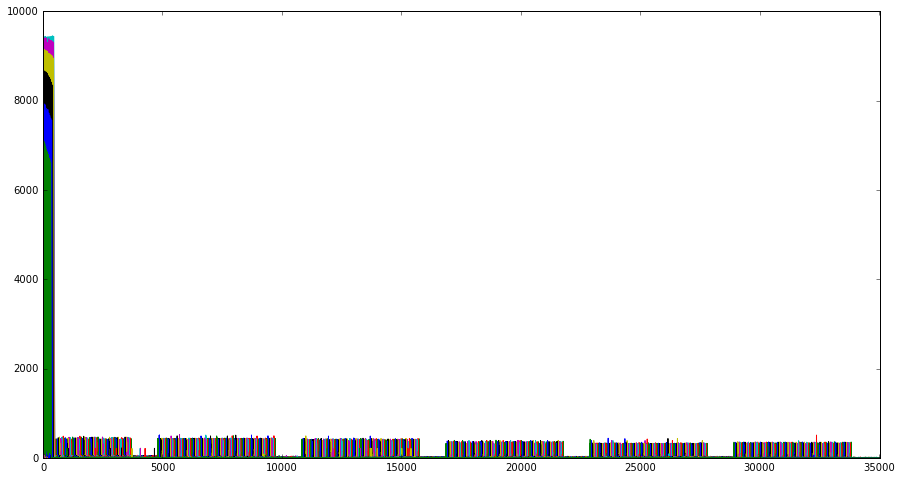

In [20]:
filename="data/100_client_1000_pub.csv"
df3 = pd.read_csv(filename, header=None)
df3 /= float(1e6)
df3[0] = df3.mean(axis=1)
df3.plot(style='-',figsize=(15,8), legend=False)
print df3[0].quantile(q=.99)
df1[2] = df3[0]

<IPython.core.display.Javascript object>


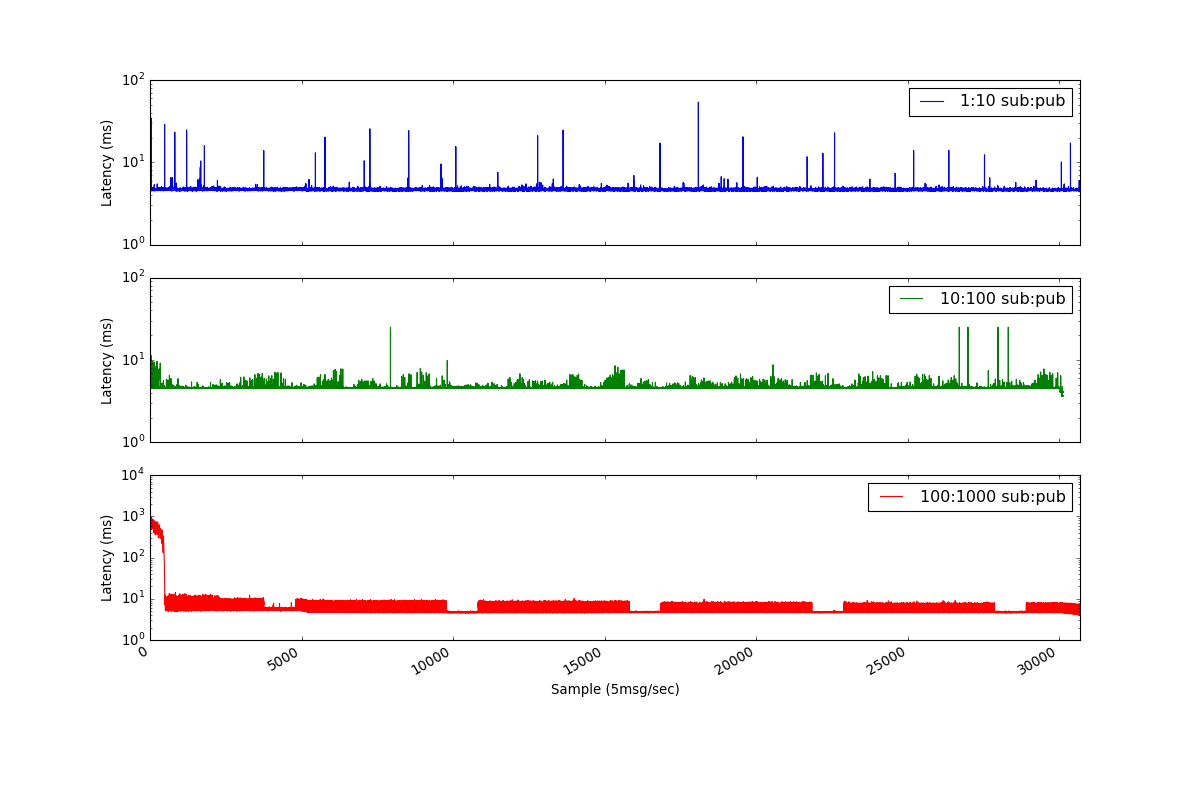

In [39]:
snp = df1[df1 > 3.5].copy()
snp.columns = ['1:10 sub:pub','10:100 sub:pub', '100:1000 sub:pub']
axs = snp.plot(figsize=(15,10), subplots=True)
for ax in axs:
    ax.set_ylabel("Latency (ms)")
    ax.set_xlabel("Sample (5msg/sec)")
    ax.set_yscale('log')

In [14]:
df1

,0,2
0,7.671533,189.823977
1,7.543374,138.616185
2,7.618414,146.660451
3,4.536318,101.419100
4,7.593946,123.901802
5,4.774033,105.662474
6,7.477275,109.038301
7,7.457885,82.578035
8,4.587200,138.985343
9,4.570765,102.673500
